# NLP twitter Sentiments about Apple and Google Products

## 1. Project Overview

This project aims to develop a Natural Language Processing (NLP) model to analyze sentiment in Tweets related to Apple and Google products. By classifying the sentiment of these Tweets as positive, negative, or neutral, the model will provide valuable insights into public perception, aiding businesses in marketing strategies and product development.


**Business Problem:**

In an era dominated by social media, brands must continuously track customer sentiments expressed online. Twitter, in particular, has become a critical platform where users voice their opinions about products and brands. However, the vast volume and rapid pace of tweets make it impractical for businesses to manually analyze these opinions for insights. To address this, a Natural Language Processing (NLP) model needs to be developed to automatically classify the sentiment of tweets and determine which brand or product is the target of those sentiments.

The dataset from CrowdFlower includes over 9,000 tweets that have been evaluated for sentiment (positive, negative, or no emotion) and tagged with the associated brand or product. The goal is to build an NLP model that can accurately and efficiently:

1. **Classify Sentiments**: Identify whether a tweet expresses positive, negative, or no emotion.
2. **Identify Brand/Product**: Recognize which brand or product is being referred to in the tweet.
3. **Handle Ambiguity**: Deal with tweets that might reference multiple brands or unclear sentiments.

Key challenges include:

- **Textual Variations**: Dealing with informal language, abbreviations, emojis, and slang used on social media.
- **Context Understanding**: Ensuring the model understands subtle and implicit expressions of sentiment.
- **Real-Time Processing**: Building a scalable solution that can process large volumes of data in real time for timely insights.

Solving this problem will help brands enhance their reputation management, respond promptly to consumer feedback, and optimize their marketing strategies based on real-time sentiment analysis.

#### Project Objectives

1.**Binary Classification Model:** The first objective is to develop a binary classification model to classify tweets as either positive or negative. Using Logistic Regression, this model aims to achieve a benchmark accuracy of 85%, serving as a proof of concept.

2.**Multiclass Classification Expansion:** After establishing a successful binary classification, we will develop a multiclass classifier to include neutral sentiments. This will provide a more comprehensive understanding of consumer sentiment and will be built using models like XGBoost and Multinomial Naive Bayes, with a target accuracy of 70%.

3.**Sentiment Comparison Between Apple and Google Products:** A final objective is to compare sentiment across the brands by analyzing the distribution of sentiments in tweets mentioning Apple, Google, and other products. This comparison will provide valuable insights for stakeholders to refine their strategies.

#### Stakeholders

Key stakeholders who would benefit from this project include:

**1. Product Managers** at Apple and Google, who can use the insights to tweak product features based on consumer sentiment.

**2. Marketing Teams** looking to assess the effectiveness of campaigns or brand perception.

**3. Customer Support Teams**, who can use the analysis to proactively address negative sentiment or capitalize on positive feedback.

**4. Consultants and market analysts** seeking to provide data-driven advice to tech companies on consumer perceptions.

##### Methodology Overview


1.**Data Understanding**
   - Familiarizing with the structure of the dataset (e.g., columns like `tweet_text`, `emotion_in_tweet_is_directed_at`, and `is_there_an_emotion_directed_at_a_brand_or_product`).
   - Identifying any initial anomalies (e.g., missing values, duplicates) that need cleaning.

2.**Data Preparation**
- Preprocessing steps:

    - Removed duplicate entries.
    - Addressed missing values by populating the emotion_in_tweet_is_directed_at column with "none" and removed entries     lacking tweet_text.
    - Applied text preprocessing techniques: tokenization, lowercasing, stopword removal, and lemmatization.

3.**Modeling**
    - Utilized key libraries: NLTK (for tokenization, stopword removal, lemmatization), sklearn's CountVectorizer (for vectorization), and pandas (for data handling).
    - Developed a logistic regression model for binary classification (positive/negative sentiment), aiming for 70% accuracy.
    - Expanded to a multiclass classifier to include neutral sentiments.

4.**Evaluation**
    - Accuracy was used as the main evaluation metric, measuring the model's overall ability to classify sentiments correctly.
    - While the model performed satisfactorily, missing values and data quality issues are potential limitations.

#### Data Understanding

We are using a dataset sourced from **CrowdFlower via Data.world,** containing approximately 9,000 tweets expressing sentiments about Apple and Google products. This dataset includes columns such as `tweet_text`, `emotion_in_tweet_is_directed_at`, and `is_there_an_emotion_directed_at_a_brand_or_product`. The main objective is to accurately classify each tweet into one of three sentiment categories: positive, negative, or neutral.

In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.tokenize import RegexpTokenizer, TweetTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer
import re

from sklearn.model_selection import train_test_split, cross_validate
from numpy import array
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tqdm import tqdm

import nltk
nltk.download('punkt')  # Download the tokenizer data
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to c:\Users\Augustine
[nltk_data]     Wanyonyi\anaconda3\envs\learn-env\lib\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [222]:
#load the dataset
df = pd.read_csv('Data\Sentiments_analysis.csv', encoding = 'unicode_escape')
df

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product


In [223]:
#looking at data, duplicates and null valuesprint
def data_summary(df):
    # Print the DataFrame info
    print(df.info())
    print(("-" * 20))
    
    # Print the total number of duplicated rows
    print('Total duplicated rows')
    print(df.duplicated().sum())
    print(("-" * 20))
    # Print the total number of null values in each column
    print('Total null values')
    
    print(df.isna().sum())    
data_summary(df)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB
None
--------------------
Total duplicated rows
22
--------------------
Total null values
tweet_text                                               1
emotion_in_tweet_is_directed_at                       5802
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64


In [224]:
#sentiment breakdown
df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts() 

is_there_an_emotion_directed_at_a_brand_or_product
No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: count, dtype: int64

<Axes: xlabel='is_there_an_emotion_directed_at_a_brand_or_product', ylabel='count'>

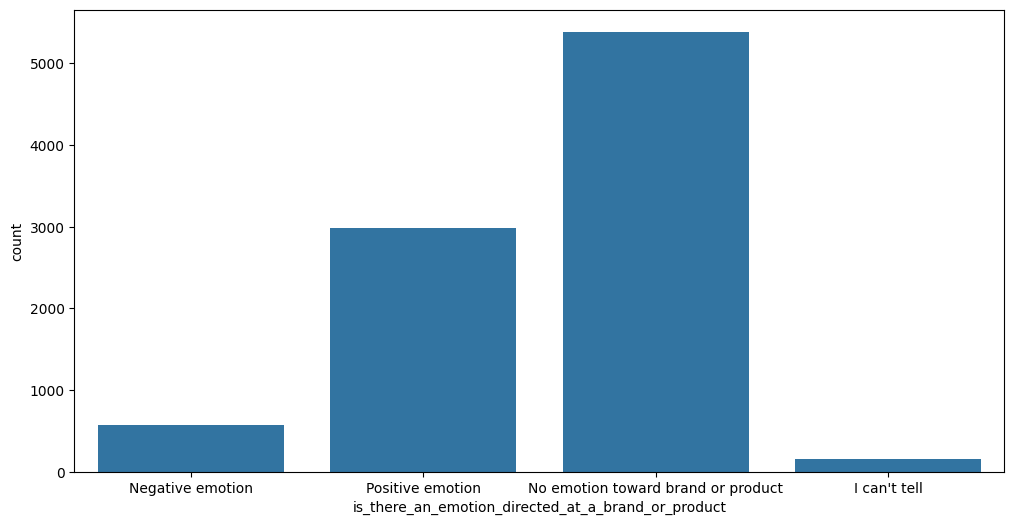

In [225]:
fig =  plt.figure(figsize=(12,6))
sns.countplot(x='is_there_an_emotion_directed_at_a_brand_or_product', data=df)

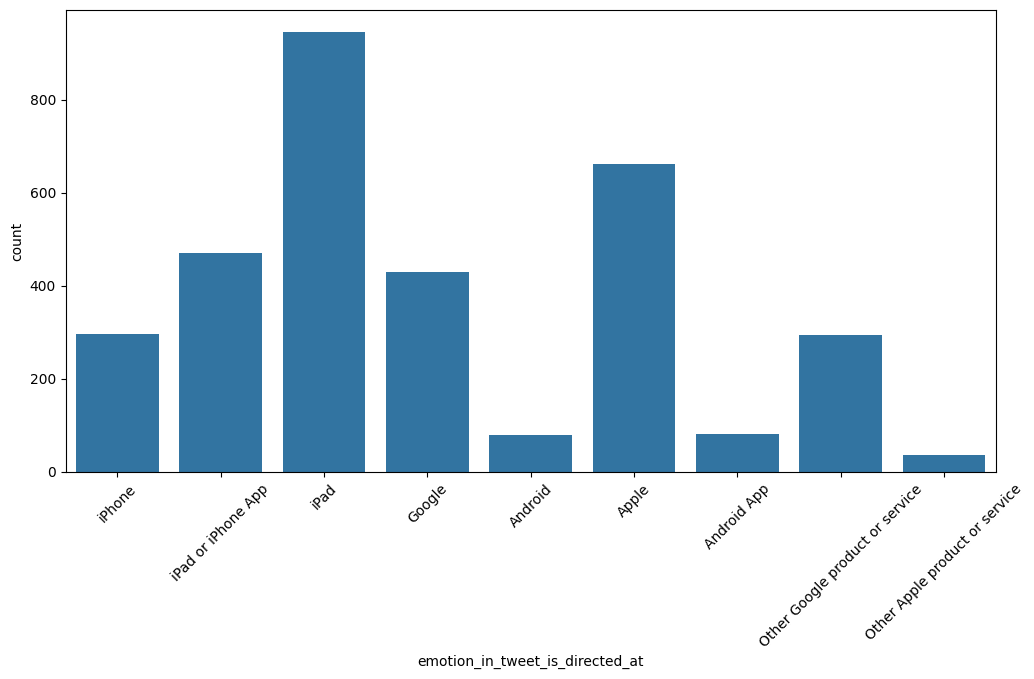

In [226]:
fig =  plt.figure(figsize=(12,6))
sns.countplot(x='emotion_in_tweet_is_directed_at', data=df)
plt.xticks(rotation=45);

There are altogether four sentiment classes in which neutral type of emotion ('No emotion...') is more prevalent. We can also see the sentiment 'I can't tell' constitutes only tiny portion of the data. Sentiment wise, this might be closer to the neutral type in which case we may  combine this to the neutral class. However, this class is already a majority class which is already causing huge imbalance in the dataset. So, we will drop the data with this class label.

##### Summary - Renaming long column names

We renamed  the column ```emotion_in_tweet_is_directed_at``` to ```product_brand``` and the column ```is_there_an_emotion_directed_at_a_brand_or_product``` to ```sentiment``` to enhance clarity and facilitate their usage in our subsequent computation

In [227]:
# Renaming the columns
data_renamed = df.rename(columns={
    'emotion_in_tweet_is_directed_at':'product_brand',
    'is_there_an_emotion_directed_at_a_brand_or_product': 'sentiment'
})

# Display the updated columns
print(data_renamed.columns)

Index(['tweet_text', 'product_brand', 'sentiment'], dtype='object')


In [228]:
# Displaying the first few rows of the DataFrame
print(data_renamed.head())

                                          tweet_text       product_brand  \
0  .@wesley83 I have a 3G iPhone. After 3 hrs twe...              iPhone   
1  @jessedee Know about @fludapp ? Awesome iPad/i...  iPad or iPhone App   
2  @swonderlin Can not wait for #iPad 2 also. The...                iPad   
3  @sxsw I hope this year's festival isn't as cra...  iPad or iPhone App   
4  @sxtxstate great stuff on Fri #SXSW: Marissa M...              Google   

          sentiment  
0  Negative emotion  
1  Positive emotion  
2  Positive emotion  
3  Negative emotion  
4  Positive emotion  


In [229]:
imputer_mode = SimpleImputer(strategy='constant')
data_renamed = pd.DataFrame(imputer_mode.fit_transform(data_renamed), columns=data_renamed.columns)
data_renamed.isna().sum()

tweet_text       0
product_brand    0
sentiment        0
dtype: int64

In [230]:
data_renamed.head()

,tweet_text,product_brand,sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [231]:

# Identify duplicates
duplicates = data_renamed[data_renamed.duplicated()]
# Display the 22 duplicates, if available
duplicates.head(22)

,tweet_text,product_brand,sentiment
468,"Before It Even Begins, Apple Wins #SXSW {link}",Apple,Positive emotion
776,Google to Launch Major New Social Network Call...,missing_value,No emotion toward brand or product
2232,Marissa Mayer: Google Will Connect the Digital...,missing_value,No emotion toward brand or product
2559,Counting down the days to #sxsw plus strong Ca...,Apple,Positive emotion
3950,Really enjoying the changes in Gowalla 3.0 for...,Android App,Positive emotion
3962,"#SXSW is just starting, #CTIA is around the co...",Android,Positive emotion
4897,"Oh. My. God. The #SXSW app for iPad is pure, u...",iPad or iPhone App,Positive emotion
5338,RT @mention ÷¼ GO BEYOND BORDERS! ÷_ {link} ...,missing_value,No emotion toward brand or product
5341,"RT @mention ÷¼ Happy Woman's Day! Make love, ...",missing_value,No emotion toward brand or product
5881,RT @mention Google to Launch Major New Social ...,missing_value,No emotion toward brand or product


In [232]:
# handling the duplicates 

data_renamed.drop_duplicates(subset=None, keep="first", inplace=True)


In [233]:
data_renamed.shape

(9071, 3)

In [234]:
# Create a working dataframe with easier column name
df = data_renamed.copy(deep=True)
df.dropna(subset=['tweet_text'], inplace=True)

# Convert the data types to string
df['tweet_text'] = df['tweet_text'].astype(str)
df['brand_item'] = df['product_brand'].astype(str)

# Brand name mapping
brand = {'iPhone': 'apple',
         'iPad or iPhone App':'apple',
         'iPad': 'apple',
         'Google': 'google',
         'nan': 'UNK',
         'Android':'google',
         'Apple': 'apple',
         'Android App':'google',
         'Other Google product or service':'google',
         'Other Apple product or service':'apple'
        }

df['product_brand'] = df['product_brand'].map(brand)

# Encoding class label to brief
label_encoder = {'Negative emotion': 'negative',
                 'Positive emotion': 'positive',
                 'No emotion toward brand or product': 'neutral',
                 "I can't tell":'neutral'}

df['sentiment'] = df['sentiment'].map(label_encoder)
df = df[df['sentiment'] != 'confused']    # drop the rows containing 'confused' labels

C:\Users\Augustine Wanyonyi\AppData\Local\Temp\ipykernel_16148\1609827060.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df,


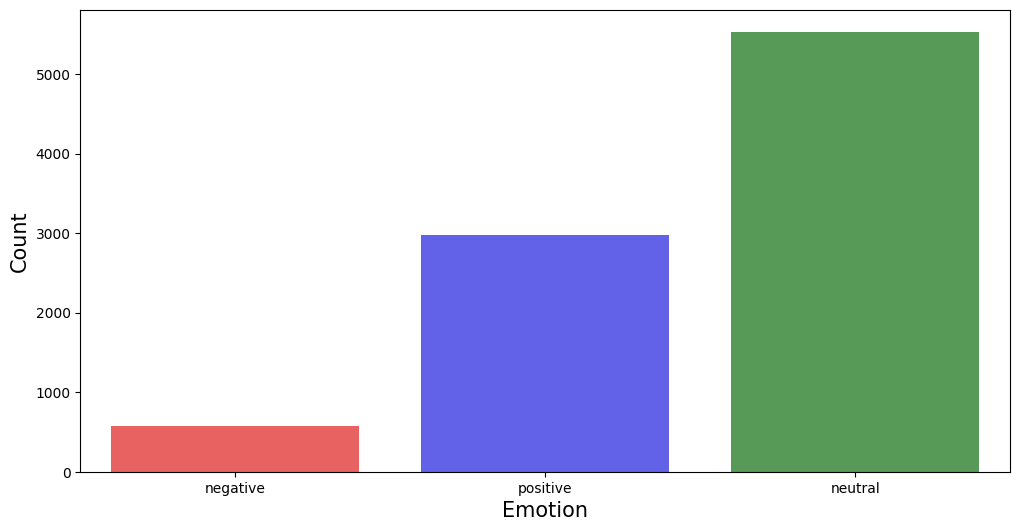

In [235]:
fig =  plt.figure(figsize=(12,6))
sns.countplot(x='sentiment', data=df,  
              palette={'positive':'b', 'negative':'r', 'neutral':'g'}, alpha=0.7)
plt.xlabel('Emotion', fontsize=15)
plt.ylabel('Count', fontsize=15);

In [236]:
df.head()

,tweet_text,product_brand,sentiment,brand_item
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,apple,negative,iPhone
1,@jessedee Know about @fludapp ? Awesome iPad/i...,apple,positive,iPad or iPhone App
2,@swonderlin Can not wait for #iPad 2 also. The...,apple,positive,iPad
3,@sxsw I hope this year's festival isn't as cra...,apple,negative,iPad or iPhone App
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,google,positive,Google


In [237]:
df.sentiment.value_counts(normalize=True)

sentiment
neutral     0.609856
positive    0.327417
negative    0.062727
Name: proportion, dtype: float64

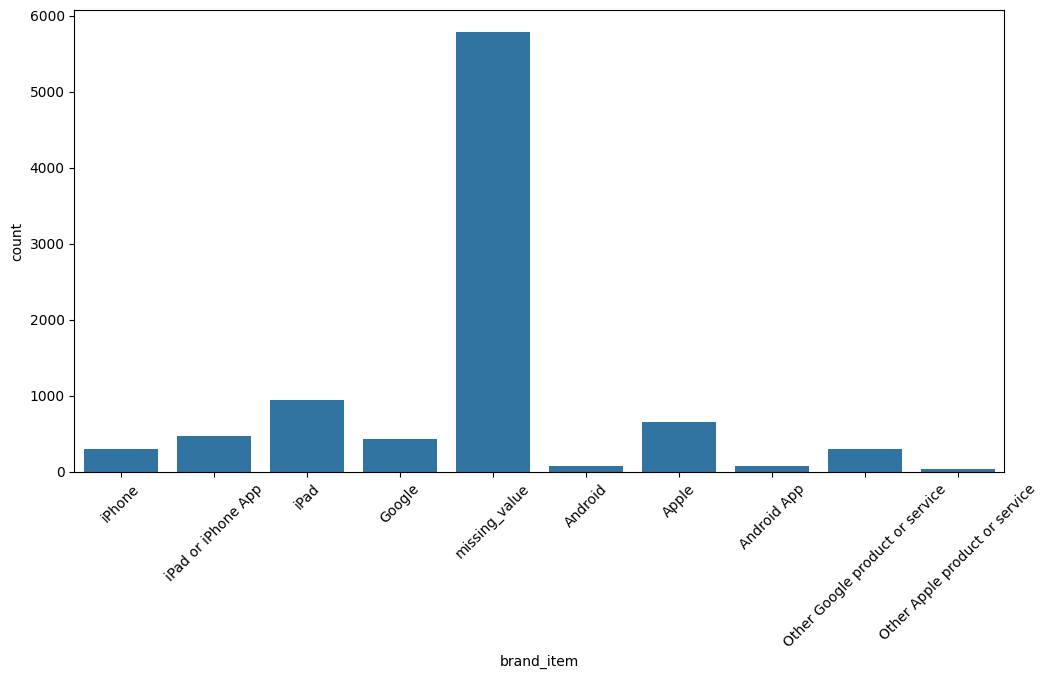

In [238]:
fig =  plt.figure(figsize=(12,6))
sns.countplot(x='brand_item', data=df)
plt.xticks(rotation=45);

We can see, the number of tweets associated with the Apple is far greater than Google. So, we will need to use a % difference between these two brands when comparing against one another.

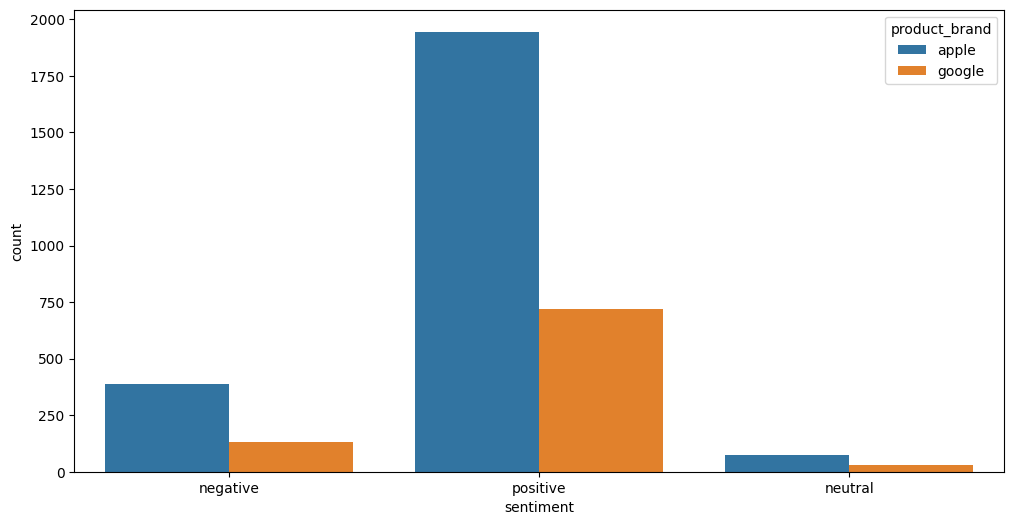

In [239]:
plt.figure(figsize=(12,6))
ax = sns.countplot(data=df, x = 'sentiment', hue='product_brand')

##  **TEXT PREPROCESSING**

In this step, we will clean the tweet_text column by:

Removing unnecessary elements such as:

URLs

Mentions (@rname)

Hashtags (#)

Special characters, digits, and extra spaces

Converting all text to lowercase to standardize the data.

Tokenizing the text and removing common stopwords (words that don't carry much meaning like "the", "and", etc.).

In [240]:
# Function to clean text
def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www.\S+', '', text)
    
    # Remove mentions and hashtags
    text = re.sub(r'@\w+|#\w+', '', text)
    
    # Remove special characters, digits, and extra spaces
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Convert to lowercase
    text = text.lower()
    
    return text

# Apply the cleaning function to the tweet_text column
df['cleaned_text'] = df['tweet_text'].apply(clean_text)

# Display the first few cleaned tweets
print("\nFirst few cleaned tweet texts:")
print(df['cleaned_text'].head())


# Print the shape of the dataframe
print("\nDataframe shape:", df.shape)


First few cleaned tweet texts:
0    i have a g iphone after hrs tweeting at it was...
1    know about awesome ipadiphone app that youll l...
2    can not wait for also they should sale them do...
3    i hope this years festival isnt as crashy as t...
4    great stuff on fri marissa mayer google tim or...
Name: cleaned_text, dtype: object

Dataframe shape: (9071, 5)


In [241]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
def advanced_preprocess(text):
    # Tokenization
    tokens = word_tokenize(text)
    
    # Remove stop words and lemmatize
    cleaned_tokens = [lemmatizer.lemmatize(token) for token in tokens if token.lower() not in stop_words]
    
    return ' '.join(cleaned_tokens), tokens
# Apply advanced preprocessing to the 'cleaned_text' column and store both results
df['preprocessed_text'], df['tokenized_text'] = zip(*df['cleaned_text'].apply(advanced_preprocess))

# Display the first few rows including the new tokenized text column
print(df[['tweet_text', 'cleaned_text', 'preprocessed_text', 'tokenized_text']].head())

# Print the shape of the dataframe
print("\nDataframe shape:", df.shape)

print(df.describe())

                                          tweet_text  \
0  .@wesley83 I have a 3G iPhone. After 3 hrs twe...   
1  @jessedee Know about @fludapp ? Awesome iPad/i...   
2  @swonderlin Can not wait for #iPad 2 also. The...   
3  @sxsw I hope this year's festival isn't as cra...   
4  @sxtxstate great stuff on Fri #SXSW: Marissa M...   

                                        cleaned_text  \
0  i have a g iphone after hrs tweeting at it was...   
1  know about awesome ipadiphone app that youll l...   
2  can not wait for also they should sale them do...   
3  i hope this years festival isnt as crashy as t...   
4  great stuff on fri marissa mayer google tim or...   

                                   preprocessed_text  \
0  g iphone hr tweeting dead need upgrade plugin ...   
1  know awesome ipadiphone app youll likely appre...   
2                                     wait also sale   
3     hope year festival isnt crashy year iphone app   
4  great stuff fri marissa mayer google tim or

In [242]:
df.head()

,tweet_text,product_brand,sentiment,brand_item,cleaned_text,preprocessed_text,tokenized_text
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,apple,negative,iPhone,i have a g iphone after hrs tweeting at it was...,g iphone hr tweeting dead need upgrade plugin ...,"[i, have, a, g, iphone, after, hrs, tweeting, ..."
1,@jessedee Know about @fludapp ? Awesome iPad/i...,apple,positive,iPad or iPhone App,know about awesome ipadiphone app that youll l...,know awesome ipadiphone app youll likely appre...,"[know, about, awesome, ipadiphone, app, that, ..."
2,@swonderlin Can not wait for #iPad 2 also. The...,apple,positive,iPad,can not wait for also they should sale them do...,wait also sale,"[can, not, wait, for, also, they, should, sale..."
3,@sxsw I hope this year's festival isn't as cra...,apple,negative,iPad or iPhone App,i hope this years festival isnt as crashy as t...,hope year festival isnt crashy year iphone app,"[i, hope, this, years, festival, isnt, as, cra..."
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,google,positive,Google,great stuff on fri marissa mayer google tim or...,great stuff fri marissa mayer google tim oreil...,"[great, stuff, on, fri, marissa, mayer, google..."


Modeling

In [243]:
# Function to prepare data for binary or multi-class classification
def prepare_data(df, binary=True):
    if binary:
        # Keep only positive and negative emotions
        df = df[df['sentiment'].isin(['positive', 'negative'])]
    else:
        df = df[df['sentiment'].isin(['neutral'])]
        
    # Encode the target variable
    le = LabelEncoder()
    df['sentiment_encoded'] = le.fit_transform(df['sentiment'])
    
    # Prepare features and target
    X = df[['preprocessed_text', 'product_brand']]
    y = df['sentiment_encoded']

    
    return X, y, le

In [244]:
df.head()

,tweet_text,product_brand,sentiment,brand_item,cleaned_text,preprocessed_text,tokenized_text
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,apple,negative,iPhone,i have a g iphone after hrs tweeting at it was...,g iphone hr tweeting dead need upgrade plugin ...,"[i, have, a, g, iphone, after, hrs, tweeting, ..."
1,@jessedee Know about @fludapp ? Awesome iPad/i...,apple,positive,iPad or iPhone App,know about awesome ipadiphone app that youll l...,know awesome ipadiphone app youll likely appre...,"[know, about, awesome, ipadiphone, app, that, ..."
2,@swonderlin Can not wait for #iPad 2 also. The...,apple,positive,iPad,can not wait for also they should sale them do...,wait also sale,"[can, not, wait, for, also, they, should, sale..."
3,@sxsw I hope this year's festival isn't as cra...,apple,negative,iPad or iPhone App,i hope this years festival isnt as crashy as t...,hope year festival isnt crashy year iphone app,"[i, hope, this, years, festival, isnt, as, cra..."
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,google,positive,Google,great stuff on fri marissa mayer google tim or...,great stuff fri marissa mayer google tim oreil...,"[great, stuff, on, fri, marissa, mayer, google..."


In [245]:
preprocessor = ColumnTransformer(
    transformers=[
        ('text_tfidf', TfidfVectorizer(max_features=5000), 'preprocessed_text'),
        ('product_onehot', OneHotEncoder(drop='first', sparse_output=False), ['product_brand'])
    ])

**PIPELINES**

In [246]:
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
#from lightgbm import LGBMClassifier

In [247]:
pipelines = {
    'Logistic Regression': Pipeline([
        ('preprocessor', preprocessor),
        ('clf', LogisticRegression(random_state=42))
    ]),
    'Random Forest': Pipeline([
        ('preprocessor', preprocessor),
        ('clf', RandomForestClassifier(n_estimators=100, random_state=42))
    ]),
    'SVM': Pipeline([
        ('preprocessor', preprocessor),
        ('clf', SVC(kernel='rbf', random_state=42))
    ]),
    'Gradient Boosting': Pipeline([
        ('preprocessor', preprocessor),
        ('clf', GradientBoostingClassifier(n_estimators=100, random_state=42))
    ]),
    'Neural Network': Pipeline([
        ('preprocessor', preprocessor),
        ('clf', MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42))
    ]),
    'XGBoost': Pipeline([
        ('preprocessor', preprocessor),
        ('clf', XGBClassifier(n_estimators=100, random_state=42))
    ])
    # 'LightGBM': Pipeline([
    #     ('preprocessor', preprocessor),
    #     ('clf', LGBMClassifier(n_estimators=100, random_state=42))
    # ])
}

### LSTM Modeling

In [248]:
# Helper function: Define callbacks and save final model

def predict(model, epochs, batch_size):
    early_stop = [EarlyStopping(monitor='val_loss', patience=5),
             ModelCheckpoint(filepath='best_model/cp.ckpt', monitor='val_loss',
                             save_weights_only = True,
                             save_best_only=True)]

    history = model.fit(X_train_seq, y_train, 
                     batch_size=batch_size, epochs=epochs, verbose=1, 
                     validation_data=(X_val_seq, y_val),
                     callbacks=early_stop,
                       )
        
#     graph_model(history, 'loss')
#     graph_model(history, 'accuracy')
    
    train_prediction = model.predict(X_train_seq, batch_size=batch_size)
    val_prediction = model.predict(X_val_seq, batch_size=batch_size)
    test_prediction = model.predict(X_test_seq, batch_size=batch_size)    
    
    return history, train_prediction, val_prediction, test_prediction,

In [254]:
# Train a simple LSTM model

embed_dim=128

model_lstm1 = Sequential()
model_lstm1.add(layers.Embedding(input_dim = vocab_size,
                    output_dim = 100,
                    input_length = maxlen))
model_lstm1.add(layers.LSTM(embed_dim, return_sequences=True))
model_lstm1.add(layers.GlobalMaxPool1D())
model_lstm1.add(layers.Dropout(0.2))
model_lstm1.add(layers.Dense(64, activation='relu'))
model_lstm1.add(layers.Dense(3, activation='softmax'))
          
model_lstm1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_lstm1.summary())

NameError: name 'vocab_size' is not defined

**TRAINING**

In [217]:
# Function to train and evaluate models
def train_and_evaluate(X, y, pipelines):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    results = {}

    for name, pipeline in pipelines.items():
        print(f"\nTraining {name}...")
        pipeline.fit(X_train, y_train)
        
        y_pred = pipeline.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred, target_names=le.classes_, output_dict=True)
        cm = confusion_matrix(y_test, y_pred)
        
        results[name] = {
            'accuracy': accuracy,
            'report': report,
            'confusion_matrix': cm
        }
        
        print(f"{name} Accuracy: {accuracy:.4f}")

    return results, X_test

### Binary classification

In [218]:
# Train and evaluate binary classification models
print("Binary Classification (Positive vs Negative)")
X, y, le = prepare_data(df, binary=True)
binary_results, X_test_binary = train_and_evaluate(X, y, pipelines)

Binary Classification (Positive vs Negative)

Training Logistic Regression...


C:\Users\Augustine Wanyonyi\AppData\Local\Temp\ipykernel_16148\3855777745.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment_encoded'] = le.fit_transform(df['sentiment'])


Logistic Regression Accuracy: 0.8658

Training Random Forest...
Random Forest Accuracy: 0.8927

Training SVM...
SVM Accuracy: 0.8729

Training Gradient Boosting...
Gradient Boosting Accuracy: 0.8672

Training Neural Network...
Neural Network Accuracy: 0.8912

Training XGBoost...
XGBoost Accuracy: 0.8701
